## 군집
* 각 군집화 기법은 나름의 장단점을 가지고 있으며 군집화하려는 데이터의 특성에 맞게 수행해야 함
* K-평균의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행. 매우 직관적인 알고리즘으로 많은 군집화 애플리케이션에 애용되지만 복잡한 구조를 가지는 데이터세트에 적용하기에는 한계가 있음. 평가는 실루엣 계수를 이용
* 평균이동(Mean Shift)은 K-평균과 유사하나 거리 중심이 아니고 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행. 컴퓨터 비전 영역에서 이미지나 영상 데이터의 특정 개체 구분에 적합한 알고리즘
* GMM(Gausian Mixture Model)은 군집화를 적용하고자 하는 데이터를 여러 개의 가우시안 분포 모델을 섞어서 생성된 모델로 가정해 수행하는 방식. K-평균 보다 유연하고 다양한 데이터 세트에 잘 적용될 수 있으나 수행 시간이 오래 걸림
* DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘으로 데이터의 분포가 기하학적으로 복잡한 데이터 세트에 효과적인 군집화가 가능함


In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris =load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(iris_df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
#비지도 학습이라 타겟을 이제줌 
iris_df['target']=iris.target
iris_df['cluster']=kmeans.labels_
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
#6개 열이 뜨는 이유는 위에 iris_df 4개 컬럼에 target과 cluster를 추가해서 6개 열이 생성 돼 있음
iris_scaled

#pca 차원축소
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(iris_scaled.data)
pca_transform
iris_df['pca_x']=pca_transform[:,0]
iris_df['pca_y']=pca_transform[:,1]

iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,pca_x,pca_y
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908


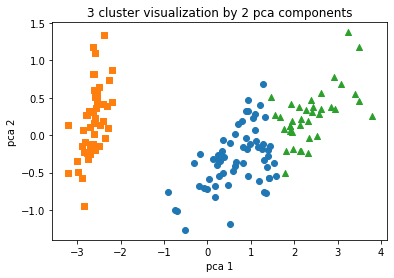

In [18]:
marker0_ind =iris_df[iris_df['cluster']==0].index
marker1_ind =iris_df[iris_df['cluster']==1].index
marker2_ind =iris_df[iris_df['cluster']==2].index

plt.scatter(x=iris_df.loc[marker0_ind,'pca_x'],y=iris_df.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=iris_df.loc[marker1_ind,'pca_x'],y=iris_df.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=iris_df.loc[marker2_ind,'pca_x'],y=iris_df.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.title('3 cluster visualization by 2 pca components')
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)
unique,counts = np.unique(y,return_counts=True)
print(unique,counts)
#y 가 3개의 클러스트값, 67 67 66 으로 균일하게 구성 

(200, 2) (200,)
[0 1 2] [67 67 66]


In [21]:
import pandas as pd
cluster_df = pd.DataFrame(data=X,columns=['ftr1','ftr2'])
cluster_df['target']=y
cluster_df.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


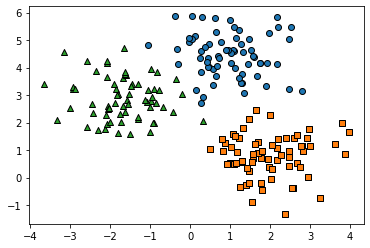

In [25]:
target_list = np.unique(y)

markers =['o','s','^','P','D','H','x']

for target in target_list:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x= target_cluster['ftr1'],y= target_cluster['ftr2'],edgecolor='k',marker=markers[target])
plt.show()

## 군집 평가 
- 실루엣 분석으로 평가, 이를 위해 metrics 모듈의 silhouette_samples, silhouette_score을 이용

- 대부분의 군집화 데이터 세트는 타겟 레이블을 가지고 있지 않다.
- 비지도 학습의 특성상 정확하게 성능을 평가하기 어렵지만 군집화의 성능을 평가하는 방법으로 실루엣 분석 이용
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는 지를 나타냄. 
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 실루엣 계수는 -1에서 1사이의 값을 가지며 1로 가까워질수록 근처의 군집과 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것임.
 - 실루엣 계수 : $s(i) = \frac{b(i) - a(i))}{max(a(i),b(i))}$

   - a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
   - b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 
   - \- 값은 아예 다른 군집에 테이터 포인트가 할당되었음을 의미
- silhouette_samples : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 각 데이터 포인트의 실루엣 계수를 반환
- silhouette_score : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 전체 데이터의 실루엣 계수 값을 평균해 반환. 즉 np.mean(silhouette_samples())과 같음. 이 값이 높을수록 군집화가 잘 됐다고 판단할 수 있지만 무조건 높다고 해서 군집화가 잘되었다고는 할 수 없다.
 - 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함


In [15]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris =load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
from sklearn.metrics import silhouette_samples,silhouette_score
kmeans = KMeans(n_clusters =3,init='k-means++',max_iter=300,random_state=0).fit(iris_df)
iris_df['cluster']=kmeans.labels_

#각 데이터의 실루엣 계수 출력
score_samples = silhouette_samples(iris.data,iris_df['cluster'])
print('silhoutte_samples() return 값의 shape:',score_samples.shape)
iris_df['silhouette_coeff']=score_samples

#전체 데이터의 실루엣계수 평균값
avg_score = silhouette_score(iris.data,iris_df['cluster'])
print('불꽃 데이터 silhoutte analysis score:{0:.3f}'.format(avg_score))
iris_df.head()

silhoutte_samples() return 값의 shape: (150,)
불꽃 데이터 silhoutte analysis score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.852955
1,4.9,3.0,1.4,0.2,0,0.815495
2,4.7,3.2,1.3,0.2,0,0.829315
3,4.6,3.1,1.5,0.2,0,0.805014
4,5.0,3.6,1.4,0.2,0,0.849302


In [35]:
iris_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.798140
1    0.451105
2    0.417320
Name: silhouette_coeff, dtype: float64

In [39]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
# 군집을 몇 개 할건지 list로 만들어준다
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

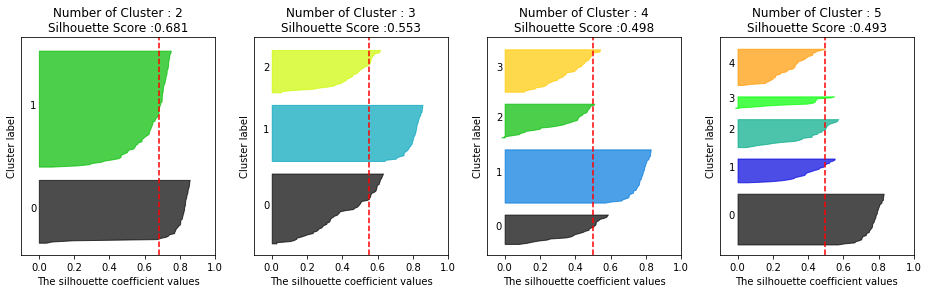

In [41]:
iris = load_iris()
visualize_silhouette([2,3,4,5],iris.data)